In [ ]:
# changing path
%cd drive/MyDrive 

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [ ]:
ls

 ai-hw-2.gdoc        finalized_model.sav   pes_22.ipynb      svc_original.sav
'Colab Notebooks'/   knn_normalized.sav    players_22.csv    svc_pca.sav
 data.csv            knn_norm.sav          rf_norm.sav       tree.dot
 dt_norm.sav         knn_original          rf_original.sav
 dt_original.sav     knn_original.sav      rf_pca.sav
 dt_pca.sav          knn_pca.sav           svc_norm.sav


In [ ]:
# importing libraries

In [ ]:
import pandas as pd # data reading
import matplotlib.pyplot as plt # data visualization
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler # data manipulation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
from sklearn.metrics import plot_confusion_matrix
import pickle
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import numpy as np
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import classification_report


# Preprocess and Data Visualization

In [ ]:
df = pd.read_csv('players_22.csv',index_col=False , encoding = "utf-8") # reading data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.shape

(19239, 110)

In [ ]:
df.head() # first rows of the data

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [ ]:
df.hist()

In [ ]:
# our dataset has 101 columns, so we chose general attributes of a football players

df = df[['value_eur','overall','potential','height_cm','weight_kg',
         'player_positions','preferred_foot','weak_foot','skill_moves',
         'pace','shooting','passing','dribbling','defending','physic',
         'attacking_finishing']]

In [ ]:
# we have 16 attribute, value_eur attribute will be target class, the rest will be independent variables
df.shape[1]

16

In [ ]:
# we have 19239 samples in our dataset
df.shape[0] 

19239

In [ ]:
# goalkeepers will be removed since their attributes are different from the players which are playing at other positions
df = df[df.player_positions != 'GK']

In [ ]:
# after removing goalkeepers, our dataset contain 17107 samples
df.reset_index(drop=True, inplace=True)

In [ ]:
# after removing goalkeepers, there are 17107 players in the dataset
df.shape[0] 

17107

In [ ]:
df = df.dropna().reset_index(drop=True)


In [ ]:
df.shape[0] 

17041

In [ ]:
df

,value_eur,overall,potential,height_cm,weight_kg,player_positions,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_finishing
0,78000000.0,93,93,170,72,"RW, ST, CF",Left,4,4,85.0,92.0,91.0,95.0,34.0,65.0,95
1,119500000.0,92,92,185,81,ST,Right,4,4,78.0,92.0,79.0,86.0,44.0,82.0,95
2,45000000.0,91,91,187,83,"ST, LW",Right,4,5,87.0,94.0,80.0,88.0,34.0,75.0,95
3,129000000.0,91,91,175,68,"LW, CAM",Right,5,5,91.0,83.0,86.0,94.0,37.0,63.0,83
4,125500000.0,91,91,181,70,"CM, CAM",Right,5,4,76.0,86.0,93.0,88.0,64.0,78.0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17036,70000.0,47,52,180,64,CDM,Right,3,2,58.0,35.0,46.0,48.0,42.0,49.0,32
17037,110000.0,47,59,175,70,CM,Right,3,2,59.0,39.0,50.0,46.0,41.0,51.0,33
17038,100000.0,47,55,178,72,CM,Right,3,2,60.0,37.0,45.0,49.0,41.0,52.0,32
17039,110000.0,47,60,173,66,ST,Right,3,2,68.0,46.0,36.0,48.0,15.0,42.0,49


In [ ]:
df.drop_duplicates(keep="first", inplace=True)

In [ ]:
df.shape[0] 

17041

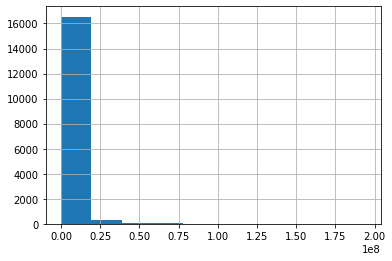

In [ ]:
df.value_eur.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70ba03a210>,
      dtype=object)

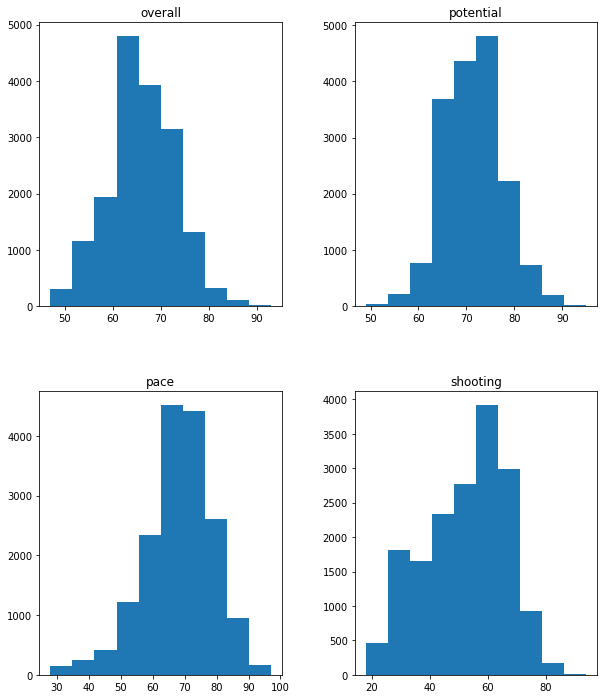

In [ ]:
fig = plt.figure(figsize = (10,12))
ax = fig.gca()
df.hist(ax = ax, column=["overall", "potential", "pace", "shooting", ], grid=False)
# df.hist(column=["overall", "potential", "pace", "shooting", "passing"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70bb1e7e90>,
      dtype=object)

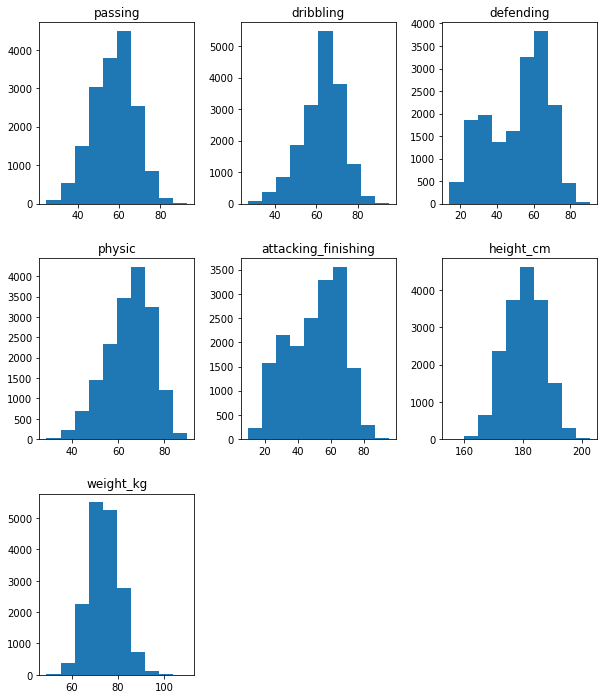

In [ ]:
fig = plt.figure(figsize = (10,12))
ax = fig.gca()
df.hist(ax=ax, column = ['passing','dribbling','defending','physic',
         'attacking_finishing','height_cm','weight_kg'], grid=False)

In [ ]:
df.head()

,value_eur,overall,potential,height_cm,weight_kg,player_positions,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_finishing
0,78000000.0,93,93,170,72,"RW, ST, CF",Left,4,4,85.0,92.0,91.0,95.0,34.0,65.0,95
1,119500000.0,92,92,185,81,ST,Right,4,4,78.0,92.0,79.0,86.0,44.0,82.0,95
2,45000000.0,91,91,187,83,"ST, LW",Right,4,5,87.0,94.0,80.0,88.0,34.0,75.0,95
3,129000000.0,91,91,175,68,"LW, CAM",Right,5,5,91.0,83.0,86.0,94.0,37.0,63.0,83
4,125500000.0,91,91,181,70,"CM, CAM",Right,5,4,76.0,86.0,93.0,88.0,64.0,78.0,82


In [ ]:
# position attributes are textual data, so they should be converted to numerical data
df['player_positions'].unique()

array(['RW, ST, CF', 'ST', 'ST, LW', 'LW, CAM', 'CM, CAM', 'CDM, CM',
       'CF, ST', 'LM, CF, LW', 'CDM', 'CB', 'LW', 'RW', 'CDM, RB', 'CM',
       'LW, RW', 'CAM', 'RW, LW', 'CAM, RM, RW', 'CM, LM', 'CB, CDM',
       'CM, CDM', 'CF, CAM', 'LB', 'CM, CDM, CB', 'RB', 'RM, CF, LM',
       'LB, LM', 'LW, CF', 'RW, RM', 'ST, RM, RW', 'CDM, CB', 'RB, LB',
       'LM, RM, LW', 'CAM, CM, RW', 'CM, RM, ST', 'CAM, CF, CM',
       'CAM, CM', 'CAM, CF', 'ST, LW, LM', 'ST, LW, RW', 'CF',
       'CF, LW, CAM', 'RM, LM, RW', 'CM, CDM, CAM', 'LM, ST', 'RB, RWB',
       'RB, RM', 'CF, ST, CAM', 'RB, RWB, RM', 'ST, RW', 'CB, LB',
       'CAM, CM, CF', 'LW, CF, CAM', 'LW, LM, CAM', 'LM, LWB', 'RW, CAM',
       'CAM, RM, ST', 'RM, LM', 'CAM, LW, CM', 'RW, LW, CAM', 'CB, RWB',
       'CM, CAM, CDM', 'CAM, RM, LM', 'CM, CDM, LM', 'CF, RM, RW',
       'ST, CF', 'LWB, LB, LM', 'LB, LWB, LM', 'LM, CM, RM', 'ST, RM',
       'ST, CAM', 'LWB, LM', 'LB, CB', 'CAM, RM', 'RW, LW, RM', 'RM, RW',
       'CAM, ST', 

In [ ]:
len(df['player_positions'].unique())

673

In [ ]:
print(df['player_positions'].isnull().sum())

0


In [ ]:
len(df['player_positions'])

17041

In [ ]:
"""
however, there are too much positions, so they should be classified as CB / LB-RB / CDM / CAM / LW-RW / ST
and this preprocess can not be done one by one, it needs te bo iterated and taking the first position if a row contains
more than one positions
"""
df_positions = df['player_positions'].tolist()

In [ ]:
len(df_positions)

17041

In [ ]:
# df converted to list, if a cell contains more than one positions, setting the cell value with first position by string operations
for i in range(len(df_positions)):
  if len(df_positions[i]) < 2:
    print(i)
  currentPosition = df_positions[i].split(",")
  if  len(currentPosition) > 1:
    df_positions[i] = currentPosition[0]


In [ ]:
listToDF = pd.DataFrame(df_positions,columns=['pos']).squeeze()

In [ ]:
df['player_positions'] = listToDF

In [ ]:
# CB / LB-RB / CDM / CAM / LW-RW / ST / CM
df['player_positions'] = df['player_positions'].replace(['LW'],"LW-RW")
df['player_positions'] = df['player_positions'].replace(['RW'],"LW-RW")
df['player_positions'] = df['player_positions'].replace(['LM'],"CM")
df['player_positions'] = df['player_positions'].replace(['RM'],"CM")
df['player_positions'] = df['player_positions'].replace(['LB'],"LB-RB")
df['player_positions'] = df['player_positions'].replace(['RB'],"LB-RB")
df['player_positions'] = df['player_positions'].replace(['LWB'],"LB-RB")
df['player_positions'] = df['player_positions'].replace(['RWB'],"LB-RB")
df['player_positions'] = df['player_positions'].replace(['CF'],"ST")

In [ ]:
pos_list = df['player_positions'].unique().tolist()

In [ ]:
pos_list

['LW-RW', 'ST', 'CM', 'CDM', 'CB', 'CAM', 'LB-RB']

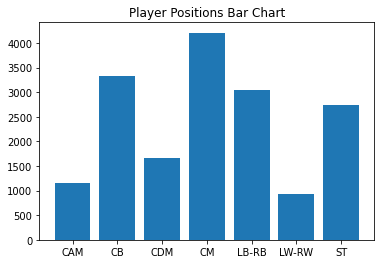

In [ ]:
key_bar, count_bar = np.unique(df['player_positions'], return_counts=True)
plt.bar(key_bar, count_bar)
plt.title("Player Positions Bar Chart")
plt.show()

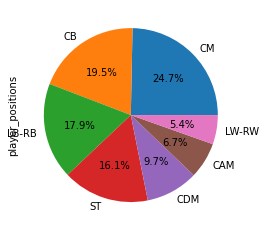

In [ ]:
df.player_positions.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
labelencoder = LabelEncoder()
df['player_positions'] = labelencoder.fit_transform(df['player_positions'])
position_dict = dict(zip(labelencoder.classes_,range(len(labelencoder.classes_))))

In [ ]:
position_dict

{'CAM': 0, 'CB': 1, 'CDM': 2, 'CM': 3, 'LB-RB': 4, 'LW-RW': 5, 'ST': 6}

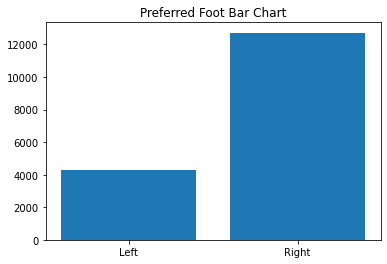

In [ ]:
key_bar, count_bar = np.unique(df['preferred_foot'], return_counts=True)
plt.bar(key_bar, count_bar)
plt.title("Preferred Foot Bar Chart")
plt.show()

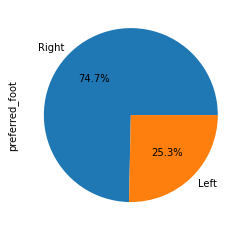

In [ ]:
x = df.preferred_foot.value_counts().plot(kind='pie',autopct='%1.1f%%')

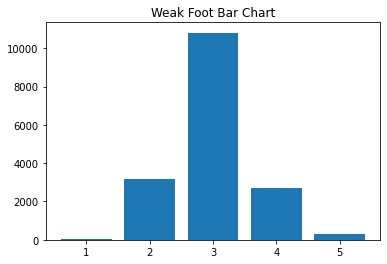

In [ ]:
key_bar, count_bar = np.unique(df['weak_foot'], return_counts=True)
plt.bar(key_bar, count_bar)
plt.title("Weak Foot Bar Chart")
plt.show()

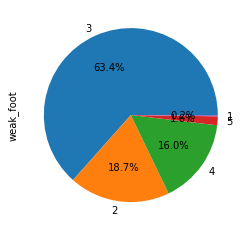

In [ ]:
df.weak_foot.value_counts().plot(kind='pie',autopct='%1.1f%%')

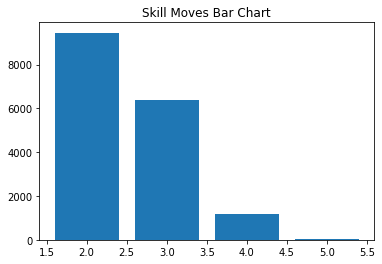

In [ ]:
key_bar, count_bar = np.unique(df['skill_moves'], return_counts=True)
y = plt.bar(key_bar, count_bar)
plt.title("Skill Moves Bar Chart")
plt.show()

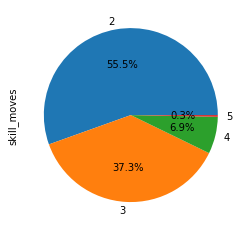

In [ ]:
df.skill_moves.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
df['preferred_foot'] = labelencoder.fit_transform(df['preferred_foot'])

In [ ]:
pref_foot_dict = dict(zip(labelencoder.classes_,range(len(labelencoder.classes_))))

In [ ]:
pref_foot_dict

{'Left': 0, 'Right': 1}

In [ ]:
df['preferred_foot'].head()

0     Left
1    Right
2    Right
3    Right
4    Right
Name: preferred_foot, dtype: object

In [ ]:
df.head()

,value_eur,overall,potential,height_cm,weight_kg,player_positions,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_finishing
0,78000000.0,93,93,170,72,5,Left,4,4,85.0,92.0,91.0,95.0,34.0,65.0,95
1,119500000.0,92,92,185,81,6,Right,4,4,78.0,92.0,79.0,86.0,44.0,82.0,95
2,45000000.0,91,91,187,83,6,Right,4,5,87.0,94.0,80.0,88.0,34.0,75.0,95
3,129000000.0,91,91,175,68,5,Right,5,5,91.0,83.0,86.0,94.0,37.0,63.0,83
4,125500000.0,91,91,181,70,3,Right,5,4,76.0,86.0,93.0,88.0,64.0,78.0,82


In [ ]:
df.isna().any()

value_eur              False
overall                False
potential              False
height_cm              False
weight_kg              False
player_positions       False
preferred_foot         False
weak_foot              False
skill_moves            False
pace                   False
shooting               False
passing                False
dribbling              False
defending              False
physic                 False
attacking_finishing    False
dtype: bool

In [ ]:
df['weak_foot'] = df['weak_foot'].multiply(0.2)
df['skill_moves'] = df['skill_moves'].multiply(0.2)


In [ ]:
df.head()

,value_eur,overall,potential,height_cm,weight_kg,player_positions,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_finishing
0,78000000.0,93,93,170,72,5,Left,0.8,0.8,85.0,92.0,91.0,95.0,34.0,65.0,95
1,119500000.0,92,92,185,81,6,Right,0.8,0.8,78.0,92.0,79.0,86.0,44.0,82.0,95
2,45000000.0,91,91,187,83,6,Right,0.8,1.0,87.0,94.0,80.0,88.0,34.0,75.0,95
3,129000000.0,91,91,175,68,5,Right,1.0,1.0,91.0,83.0,86.0,94.0,37.0,63.0,83
4,125500000.0,91,91,181,70,3,Right,1.0,0.8,76.0,86.0,93.0,88.0,64.0,78.0,82


In [ ]:
df[['overall','potential',"pace", "shooting", 
    "passing", "dribbling", "defending", "physic",
    "attacking_finishing", "height_cm", 'weight_kg']] /= 100

In [ ]:
df.head()

,value_eur,overall,potential,height_cm,weight_kg,player_positions,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_finishing
0,78000000.0,0.93,0.93,1.70,0.72,5,Left,0.8,0.8,0.85,0.92,0.91,0.95,0.34,0.65,0.95
1,119500000.0,0.92,0.92,1.85,0.81,6,Right,0.8,0.8,0.78,0.92,0.79,0.86,0.44,0.82,0.95
2,45000000.0,0.91,0.91,1.87,0.83,6,Right,0.8,1.0,0.87,0.94,0.80,0.88,0.34,0.75,0.95
3,129000000.0,0.91,0.91,1.75,0.68,5,Right,1.0,1.0,0.91,0.83,0.86,0.94,0.37,0.63,0.83
4,125500000.0,0.91,0.91,1.81,0.70,3,Right,1.0,0.8,0.76,0.86,0.93,0.88,0.64,0.78,0.82


In [ ]:
min(df['value_eur'])

15000.0

In [ ]:
((15000 <= df['value_eur']) & (df['value_eur'] < 750000)).sum()

6359

In [ ]:
((750000 <= df['value_eur']) & (df['value_eur'] < 2500000)).sum()

6966

In [ ]:
((2500000 <= df['value_eur']) & (df['value_eur'] < 10000000)).sum()

2688

In [ ]:
((10000000 <= df['value_eur']) & (df['value_eur'] < 50000000)).sum()

938

In [ ]:
((50000000 <= df['value_eur'])).sum()

90

In [ ]:
df['value_eur'].max()

194000000.0

In [ ]:
df['value_eur'] = pd.cut(df['value_eur'], bins=[0, 749999, 2499999,
                  9999999, 49999999, 200000000], labels=[1,2,3,4,5])

In [ ]:
value_labels = ["0-750k", "750k-2.5m", "2.5m-10m", "10m-50m", "50m+"]

In [ ]:
key_bar, count_bar = np.unique(df['value_eur'], return_counts=True)

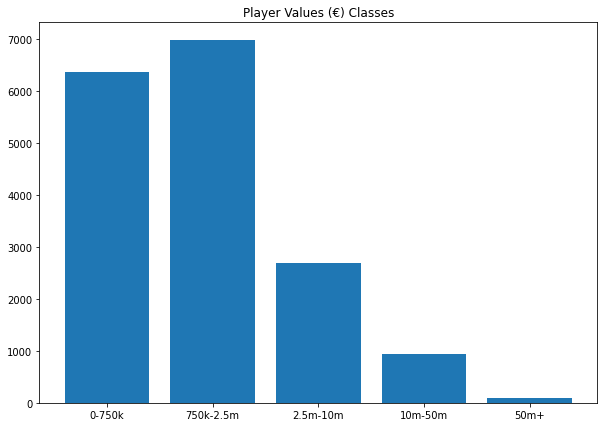

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(value_labels, count_bar)
plt.title("Player Values (€) Classes")
plt.show()

In [ ]:
features = ['overall', 'potential', 'height_cm', 'weight_kg',
       'player_positions', 'preferred_foot', 'weak_foot', 'skill_moves',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_finishing']

X = df.loc[:, features]
y = df.loc[:,['value_eur']]


In [ ]:
X.isnull().values.any()

False

In [ ]:
y.isnull().values.any()

False

In [ ]:
X.head()

,overall,potential,height_cm,weight_kg,player_positions,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_finishing
0,0.93,0.93,1.70,0.72,5,0,0.8,0.8,0.85,0.92,0.91,0.95,0.34,0.65,0.95
1,0.92,0.92,1.85,0.81,6,1,0.8,0.8,0.78,0.92,0.79,0.86,0.44,0.82,0.95
2,0.91,0.91,1.87,0.83,6,1,0.8,1.0,0.87,0.94,0.80,0.88,0.34,0.75,0.95
3,0.91,0.91,1.75,0.68,5,1,1.0,1.0,0.91,0.83,0.86,0.94,0.37,0.63,0.83
4,0.91,0.91,1.81,0.70,3,1,1.0,0.8,0.76,0.86,0.93,0.88,0.64,0.78,0.82


In [ ]:
y.head()

,value_eur
0,5
1,5
2,4
3,5
4,5


In [ ]:
X.shape, y.shape

((17041, 15), (17041, 1))

In [ ]:
# train test split, PCA ve normalizasyon islemleri
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train)
X_test_pca = scaler.transform(X_test)
pca = PCA(n_components=5)

X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.fit_transform(X_test_pca)

X_train_norm = preprocessing.normalize(X_train)  
X_test_norm = preprocessing.normalize(X_test)  

# KNN

In [ ]:
params = {
    'n_neighbors': [7, 5, 3, 9]
}

#### knn with original data 
knn = KNeighborsClassifier()
cv = GridSearchCV(estimator=knn, param_grid=params, cv=10)
cv.fit(X_train, y_train)
KNN_original = KNeighborsClassifier(n_neighbors=cv.best_params_["n_neighbors"])
KNN_original.fit(X_train, y_train)
y_preds_KNN = KNN_original.predict(X_test)
KNN_accuracy_original = metrics.accuracy_score(y_test, y_preds_KNN)
KNN_f1_original = metrics.f1_score(y_test, y_preds_KNN, average="weighted")
print("Accuracy With KNN (original):",KNN_accuracy_original)
print("Accuracy With KNN (original):",KNN_f1_original)


### knn with pca data
knn = KNeighborsClassifier()
cv = GridSearchCV(estimator=knn, param_grid=params, cv=10)
cv.fit(X_train_pca, y_train)
KNN_pca = KNeighborsClassifier(n_neighbors=cv.best_params_["n_neighbors"])
KNN_pca.fit(X_train_pca,y_train) 
KNN_preds_original = KNN_pca.predict(X_test_pca)
KNN_accuracy_pca = metrics.accuracy_score(y_test, KNN_preds_original)
KNN_f1_pca = metrics.f1_score(y_test, KNN_preds_original, average="weighted")
print("\nAccuracy With KNN (PCA):",KNN_accuracy_pca)
print("F1 With KNN (PCA Data):", KNN_f1_pca)

### knn with normalized data
knn = KNeighborsClassifier()
cv = GridSearchCV(estimator=knn, param_grid=params, cv=10)
cv.fit(X_train_norm, y_train)
KNN_norm = KNeighborsClassifier(n_neighbors=cv.best_params_["n_neighbors"])
KNN_norm.fit(X_train_norm,y_train) # normalized test datasi ile test
KNN_preds_norm = KNN_norm.predict(X_test_norm) # normalized test datasi ile predict
KNN_acc_norm = metrics.accuracy_score(y_test,KNN_preds_norm)
KNN_F1_norm = metrics.f1_score(y_test, KNN_preds_norm, average="weighted")
print("\nAccuracy With KNN (Normalized):",KNN_acc_norm)
print("F1 With KNN (Normalized):", KNN_F1_norm)

Accuracy With KNN (original): 0.7468465825755354
Accuracy With KNN (original): 0.7444439759102224

Accuracy With KNN (PCA): 0.39894397183924907
F1 With KNN (PCA Data): 0.39591349741263426

Accuracy With KNN (Normalized): 0.7268993839835729
F1 With KNN (Normalized): 0.7220299507533903


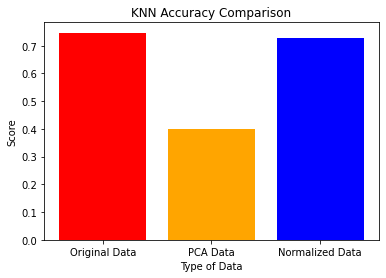

In [ ]:
# accuracy comparison of knn models trained with different datasets
y= [KNN_accuracy_original, KNN_accuracy_pca, KNN_acc_norm]
x = [1, 2, 3]
tick_label = ['Original Data', 'PCA Data' , 'Normalized Data']
plt.bar(x, y, tick_label = tick_label,
        width = 0.8, color = ['red', 'orange','blue'])
plt.xlabel('Type of Data')
plt.ylabel('Score')
plt.title('KNN Accuracy Comparison')

plt.show()


# DECISION TREE

In [ ]:
params = {
    "criterion":["gini", "entropy"]
}
DT_ = DecisionTreeClassifier() 
cv = GridSearchCV(DT, param_grid=params, cv=10)
cv.fit(X_train, y_train)
DT_original = DecisionTreeClassifier(criterion=cv.best_params_["criterion"])

# DT with original data
DT_original.fit(X_train,y_train)
y_preds_DT = DT_original.predict(X_test)
DT_accuracy = metrics.accuracy_score(y_test, y_preds_DT)
DT_f1_original = metrics.f1_score(y_test, y_preds_DT, average="weighted")
print("Accuracy With Decision Tree (Original Data):",DT_accuracy)
print("F1 With Decision Tree (Original Data)", DT_f1_original)

# DT with PCA data
DT = DecisionTreeClassifier()
cv = GridSearchCV(estimator=DT, param_grid=params, cv=10)
cv.fit(X_train_pca, y_train)
DT_pca = DecisionTreeClassifier(criterion=cv.best_params_["criterion"])
DT_pca.fit(X_train_pca,y_train)
y_preds_DT_pca = DT_pca.predict(X_test_pca)
DT_accuracy_pca = metrics.accuracy_score(y_test, y_preds_DT_pca)
DT_f1_pca = metrics.f1_score(y_test, y_preds_DT_pca, average="weighted")
print("\nAccuracy With Decision Tree (PCA Data):",DT_accuracy_pca)
print("F1 With Decision Tree (PCA Data):", DT_f1_pca)

# DT with normalized data
DT = DecisionTreeClassifier()
cv = GridSearchCV(estimator=DT, param_grid=params, cv=10)
cv.fit(X_train_norm, y_train)
DT_norm = DecisionTreeClassifier(criterion=cv.best_params_["criterion"])
DT_norm.fit(X_train_norm,y_train)
y_preds_DT_norm = DT_norm.predict(X_test_norm)
DT_accuracy_norm = metrics.accuracy_score(y_test, y_preds_DT_norm)
DT_f1_norm = metrics.f1_score(y_test, y_preds_DT_norm, average="weighted")
print("\nAccuracy With Decision Tree (Normalized Data):",DT_accuracy_norm)
print("F1 With Decision Tree (Normalized Data): ", DT_f1_norm)



Accuracy With Decision Tree (Original Data): 0.9172777940745086
F1 With Decision Tree (Original Data) 0.9171831824184806

Accuracy With Decision Tree (PCA Data): 0.39014373716632444
F1 With Decision Tree (PCA Data): 0.39189744658266096

Accuracy With Decision Tree (Normalized Data): 0.8386623643297154
F1 With Decision Tree (Normalized Data):  0.8386226862270582


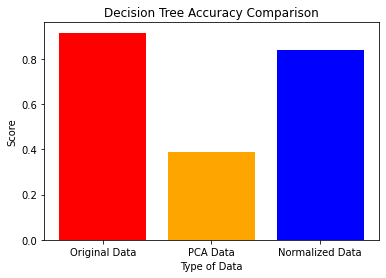

In [ ]:
# accuracy comparison of DT trained with different datasets
y= [DT_accuracy, DT_accuracy_pca, DT_accuracy_norm]
x = [1, 2, 3]
tick_label = ['Original Data', 'PCA Data' , 'Normalized Data']
plt.bar(x, y, tick_label = tick_label,
        width = 0.8, color = ['red', 'orange','blue'])
plt.xlabel('Type of Data')
plt.ylabel('Score')
plt.title('Decision Tree Accuracy Comparison')

plt.show()

# Random Forest Classifier

In [ ]:
RFC = RandomForestClassifier()

params = {
    "n_estimators":[100,200],
    "criterion":["gini","entropy"]
}

# rf with original data
cv = GridSearchCV(estimator=RFC, param_grid=params, cv=10)
cv.fit(X_train,y_train)
RFC_original = RandomForestClassifier(random_state=34, n_estimators=cv.best_params_["n_estimators"], criterion=cv.best_params_["criterion"])
RFC_original.fit(X_train, y_train)
RFC_preds_original = RFC_original.predict(X_test)
RFC_accuracy_original = metrics.accuracy_score(y_test, RFC_preds_original)
RFC_f1_original = metrics.f1_score(y_test, RFC_preds_original, average = "weighted")

print("Accuracy With Random Forest (Original Data): ", RFC_accuracy_original)
print("F1 With Random Forest (Original Data)", RFC_f1_original)


# rf with PCA data
cv = GridSearchCV(estimator=RFC, param_grid=params, cv=10)
cv.fit(X_train_pca,y_train)
RFC_pca = RandomForestClassifier(random_state=34, n_estimators=cv.best_params_["n_estimators"], criterion=cv.best_params_["criterion"])
RFC_pca.fit(X_train_pca, y_train)
RFC_preds_pca = RFC_pca.predict(X_test_pca)
RFC_accuracy_pca = metrics.accuracy_score(y_test, RFC_preds_pca)
RFC_f1_pca = metrics.f1_score(y_test, RFC_preds_pca, average = "weighted")

print("\nAccuracy With Random Forest: (PCA Data)", RFC_accuracy_pca)
print("F1 With Random Forest (Original Data)", RFC_f1_pca)

# rf with normalized data
cv = GridSearchCV(estimator=RFC, param_grid=params, cv=10)
cv.fit(X_train_norm,y_train)
RFC_norm = RandomForestClassifier(random_state=34, n_estimators=cv.best_params_["n_estimators"], criterion=cv.best_params_["criterion"])
RFC_norm.fit(X_train_norm, y_train)
RFC_preds_norm = RFC_norm.predict(X_test_norm)
RFC_accuracy_norm = metrics.accuracy_score(y_test, RFC_preds_norm)
RFC_f1_norm = metrics.f1_score(y_test, RFC_preds_norm, average = "weighted")
print("\nAccuracy With Random Forest: (Normalized Data)", RFC_accuracy_norm)
print("F1 With Random Forest (Normalized Data)", RFC_f1_norm)


Accuracy With Random Forest (Original Data):  0.9392783807568201
F1 With Random Forest (Original Data) 0.9391086125674056

Accuracy With Random Forest: (PCA Data) 0.3936638310354943
F1 With Random Forest (Original Data) 0.3920840505060342

Accuracy With Random Forest: (Normalized Data) 0.8656497506600176
F1 With Random Forest (Normalized Data) 0.8646713098603125


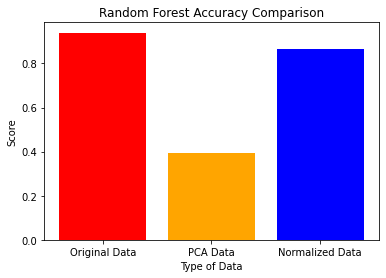

In [ ]:
# accuracy coomparison of RFC models trained with different datasets
y= [RFC_accuracy_original, RFC_accuracy_pca, RFC_accuracy_norm]
x = [1, 2, 3]
tick_label = ['Original Data', 'PCA Data' , 'Normalized Data']
plt.bar(x, y, tick_label = tick_label,
        width = 0.8, color = ['red', 'orange','blue'])
plt.xlabel('Type of Data')
plt.ylabel('Score')
plt.title('Random Forest Accuracy Comparison')

plt.show()

# Support Vector Machines

In [ ]:

svc = SVC()
params = {
    "kernel":["linear"]
}

# svc with original data
cv = GridSearchCV(estimator=svc, param_grid=params, cv=10)
cv.fit(X_train, y_train)
SVC_original= SVC(kernel=cv.best_params_["kernel"])
SVC_original.fit(X_train, y_train)
SVC_preds_original = SVC_original.predict(X_test)
SVC_accuracy_original = metrics.accuracy_score(y_test, SVC_preds_original)
SVC_f1_original = metrics.f1_score(y_test, SVC_preds_original, average="weighted")
print("Accuracy With Support Vector Machines: (Original Data)", SVC_accuracy_original)
print("F1 With Support Vector Machine (Original Data):", SVC_f1_original)

# svc with PCA data
svc = SVC()
cv = GridSearchCV(estimator=svc, param_grid=params, cv=10)
cv.fit(X_train_pca, y_train)
SVC_pca = SVC(kernel=cv.best_params_["kernel"])
SVC_pca.fit(X_train_pca, y_train)
SVC_preds_pca = SVC_pca.predict(X_test_pca)
SVC_accuracy_pca = metrics.accuracy_score(y_test, SVC_preds_pca)
SVC_f1_pca = metrics.f1_score(y_test, SVC_preds_pca, average="weighted")
print("\nAccuracy With Support Vector Machines: (PCA Data) ", SVC_accuracy_pca)
print("F1 With Support Vector Machine (Original Data):", SVC_f1_pca)

# svc with normalized data
svc = SVC()
cv = GridSearchCV(estimator=svc, param_grid=params, cv=10)
cv.fit(X_train_norm, y_train)
SVC_norm = SVC(kernel=cv.best_params_["kernel"])
SVC_norm.fit(X_train_norm, y_train)
SVC_preds_norm = SVC_norm.predict(X_test_norm)
SVC_accuracy_norm = metrics.accuracy_score(y_test, SVC_preds_norm)
SVC_f1_norm = metrics.f1_score(y_test, SVC_preds_norm,average="weighted")
print("\nAccuracy With Support Vector Machines: (Normalized Data) ", SVC_accuracy_norm)
print("F1 With Support Vector Machine (Normalized):", SVC_f1_norm)

Accuracy With Support Vector Machines: (Original Data) 0.8688765033734233
F1 With Support Vector Machine (Original Data): 0.8656142993733797

Accuracy With Support Vector Machines: (PCA Data)  0.3681431504840129
F1 With Support Vector Machine (Original Data): 0.3670337631199984

Accuracy With Support Vector Machines: (Normalized Data)  0.629803461425638
F1 With Support Vector Machine (Normalized): 0.5619846740303651


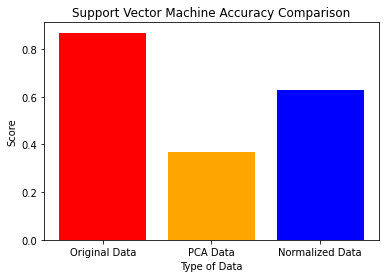

In [ ]:
# accuracy comparison of SVC models trained with different datasets
y= [SVC_accuracy_original, SVC_accuracy_pca, SVC_accuracy_norm]
x = [1, 2, 3]
tick_label = ['Original Data', 'PCA Data' , 'Normalized Data']
plt.bar(x, y, tick_label = tick_label,
        width = 0.8, color = ['red', 'orange','blue'])
plt.xlabel('Type of Data')
plt.ylabel('Score')
plt.title('Support Vector Machine Accuracy Comparison')

plt.show()

# Saving Models and Confusion Matrix

In [ ]:
import pickle

def save_trained_model(filename, model):
  pickle.dump(model, open(filename+".sav", 'wb'))
 
def load_from_pretrained(filename):
  loaded_model = pickle.load(open(filename, 'rb'))
  return loaded_model

In [ ]:
save_trained_model("knn_original", KNN_original)
save_trained_model("knn_pca", KNN_pca)
save_trained_model("knn_norm", KNN_norm)

save_trained_model("dt_original", DT_original)
save_trained_model("dt_pca", DT_pca)
save_trained_model("dt_norm", DT_norm)

save_trained_model("rf_original", RFC_original)
save_trained_model("rf_pca", RFC_pca)
save_trained_model("rf_norm", RFC_norm)

save_trained_model("svc_original",SVC_original)
save_trained_model("svc_pca",SVC_pca)
save_trained_model("svc_norm",SVC_norm)


In [ ]:
target_names = ['0-750000', '750k - 2.5 m', '2.5 m - 10 m','10m - 50m','50m - 200m']
print(classification_report(y_test, y_preds_KNN, target_names=target_names))
print("Confusion Matrix for Best KNN Model")

              precision    recall  f1-score   support

    0-750000       0.84      0.78      0.81      1245
750k - 2.5 m       0.71      0.81      0.76      1421
2.5 m - 10 m       0.62      0.61      0.62       515
   10m - 50m       0.77      0.50      0.61       204
  50m - 200m       1.00      0.17      0.29        24

    accuracy                           0.75      3409
   macro avg       0.79      0.58      0.62      3409
weighted avg       0.75      0.75      0.74      3409

Confusion Matrix for Best KNN Model


In [ ]:
target_names = ['0-750000', '750k - 2.5 m', '2.5 m - 10 m','10m - 50m','50m - 200m']
print(classification_report(y_test, y_preds_DT, target_names=target_names))
print("Confusion Matrix for Best Decision Tree Model")

              precision    recall  f1-score   support

    0-750000       0.94      0.93      0.93      1245
750k - 2.5 m       0.91      0.92      0.91      1421
2.5 m - 10 m       0.89      0.91      0.90       515
   10m - 50m       0.92      0.88      0.90       204
  50m - 200m       0.80      0.67      0.73        24

    accuracy                           0.92      3409
   macro avg       0.89      0.86      0.87      3409
weighted avg       0.92      0.92      0.92      3409

Confusion Matrix for Best Decision Tree Model


In [ ]:
target_names = ['0-750000', '750k - 2.5 m', '2.5 m - 10 m','10m - 50m','50m - 200m']
print(classification_report(y_test, RFC_preds_original, target_names=target_names))
print("Confusion Matrix for Best Random Forest Model")

              precision    recall  f1-score   support

    0-750000       0.98      0.93      0.95      1245
750k - 2.5 m       0.92      0.96      0.94      1421
2.5 m - 10 m       0.90      0.94      0.92       515
   10m - 50m       0.92      0.90      0.91       204
  50m - 200m       0.93      0.54      0.68        24

    accuracy                           0.94      3409
   macro avg       0.93      0.85      0.88      3409
weighted avg       0.94      0.94      0.94      3409

Confusion Matrix for Best Random Forest Model


In [ ]:
target_names = ['0-750000', '750k - 2.5 m', '2.5 m - 10 m','10m - 50m','50m - 200m']
print(classification_report(y_test, SVC_preds_original, target_names=target_names))
print("Confusion Matrix for Best Support Vector Machine Model")

              precision    recall  f1-score   support

    0-750000       0.93      0.89      0.91      1245
750k - 2.5 m       0.85      0.90      0.88      1421
2.5 m - 10 m       0.79      0.83      0.81       515
   10m - 50m       0.83      0.69      0.75       204
  50m - 200m       0.00      0.00      0.00        24

    accuracy                           0.87      3409
   macro avg       0.68      0.66      0.67      3409
weighted avg       0.86      0.87      0.87      3409

Confusion Matrix for Best Support Vector Machine Model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


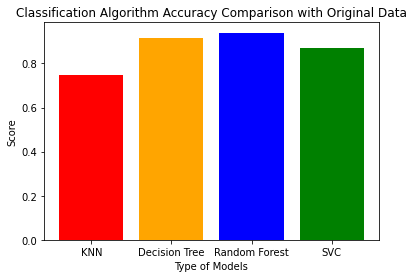

In [ ]:
y= [KNN_accuracy_original, DT_accuracy, RFC_accuracy_original, SVC_accuracy_original]
x = [1, 2, 3, 4]
tick_label = ['KNN', 'Decision Tree' , 'Random Forest', 'SVC']
plt.bar(x, y, tick_label = tick_label,
        width = 0.8, color = ['red', 'orange','blue','green'])
plt.xlabel('Type of Models')
plt.ylabel('Score')
plt.title('Classification Algorithm Accuracy Comparison with Original Data')

plt.show()

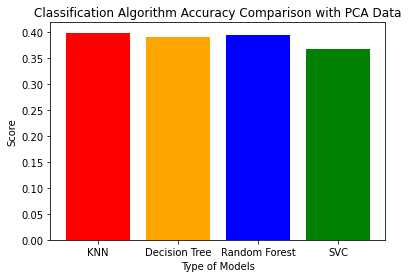

In [ ]:
y= [KNN_accuracy_pca, DT_accuracy_pca, RFC_accuracy_pca, SVC_accuracy_pca]
x = [1, 2, 3, 4]
tick_label = ['KNN', 'Decision Tree' , 'Random Forest', 'SVC']
plt.bar(x, y, tick_label = tick_label,
        width = 0.8, color = ['red', 'orange','blue','green'])
plt.xlabel('Type of Models')
plt.ylabel('Score')
plt.title('Classification Algorithm Accuracy Comparison with PCA Data')

plt.show()

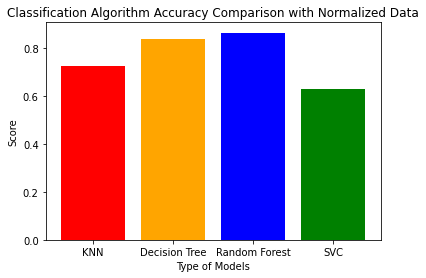

In [ ]:
y= [KNN_acc_norm, DT_accuracy_norm, RFC_accuracy_norm, SVC_accuracy_norm]
x = [1, 2, 3, 4]
tick_label = ['KNN', 'Decision Tree' , 'Random Forest', 'SVC']
plt.bar(x, y, tick_label = tick_label,
        width = 0.8, color = ['red', 'orange','blue','green'])
plt.xlabel('Type of Models')
plt.ylabel('Score')
plt.title('Classification Algorithm Accuracy Comparison with Normalized Data')

plt.show()

# Custom Input Prediction

**Mevki**

*   CAM = 0
*   CB = 1
*   CDM = 2
*   CM = 3
*   LB-RB = 4
*   LW-RW = 5
*   ST = 6

**Sağ-Sol Ayak**
*   Left = 0
*   Right = 1

**Bonservis**

*   0 - 750k -> 1
* 750k - 2.5m -> 2
* 2.5m - 10m -> 3
* 10m - 50m -> 4
* 50m + -> 5

['overall', 'potential', 'height_cm', 'weight_kg', 'player_positions', 'preferred_foot', 'weak_foot', 'skill_moves', 'pace', 'shooting', 'passing' 'dribbling', 'defending', 'physic', 'attacking_finishing']

In [ ]:
import pickle

def save_trained_model(filename, model):
  pickle.dump(model, open(filename+".sav", 'wb'))
 
def load_from_pretrained(filename):
  loaded_model = pickle.load(open(filename, 'rb'))
  return loaded_model

In [ ]:
position_dict = {'CAM': 0, 'CB': 1, 'CDM': 2, 'CM': 3, 'LB-RB': 4, 'LW-RW': 5, 'ST': 6}
pref_foot_dict = {'Left': 0, "Right":1}
value_dict = {'0-750k €':1, '750k - 2.5m €': 2, '2.5m - 10m €': 3, '10m - 50m €': 4, '50m + €': 5 }

In [ ]:
overall = 95 / 100
potential = 95 / 100
height_cm = 180 / 100
weight_kg = 80 / 100
player_positions = "ST"
preferred_foot = "Left"
weak_foot = 4 / 5
skill_moves = 4 / 5
pace = 78 / 100
shooting = 85 / 100
passing = 83 / 100
dribbling = 79 / 100
defending = 60 / 100
physic = 80 / 100
attacking_finishing = 70 / 100

# overall = 66 / 100
# potential = 68 / 100
# height_cm = 190 / 100
# weight_kg = 100 / 100
# player_positions = "CB"
# preferred_foot = "Right"
# weak_foot = 2 / 5
# skill_moves = 2 / 5
# pace = 58 / 100
# shooting = 60 / 100
# passing = 40 / 100
# dribbling = 65 / 100
# defending = 50 / 100
# physic = 61 / 100
# attacking_finishing = 70 / 100

# overall = 77 / 100
# potential = 85 / 100
# height_cm = 160 / 100
# weight_kg = 70 / 100
# player_positions = "LW-RW"
# preferred_foot = "Right"
# weak_foot = 3 / 5
# skill_moves = 5 / 5
# pace = 70 / 100
# shooting = 55 / 100
# passing = 68 / 100
# dribbling = 47 / 100
# defending = 40 / 100
# physic = 58 / 100
# attacking_finishing = 65 / 100

player_positions = position_dict.get(player_positions)
preferred_foot = pref_foot_dict.get(preferred_foot)

knn_model = load_from_pretrained("knn_original.sav")
dt_model = load_from_pretrained("dt_original.sav")
rf_model = load_from_pretrained("rf_original.sav")
svc_model = load_from_pretrained("svc_original.sav")


predict_array = [[overall, potential, height_cm, weight_kg, player_positions, preferred_foot, weak_foot, skill_moves, pace, shooting, passing, dribbling, defending, physic, attacking_finishing]]

knn_result = knn_model.predict(predict_array)[0]
dt_result = dt_model.predict(predict_array)[0]
rf_result = rf_model.predict(predict_array)[0]
svc_result = svc_model.predict(predict_array)[0]

key_list = list(value_dict.keys())
val_list = list(value_dict.values())

index_knn = val_list.index(knn_result)
print("Oyuncunun Bonservis Bedeli Tahmini Aralığı (KNN): ", key_list[index_knn])

index_dt = val_list.index(dt_result)
print("\nOyuncunun Bonservis Bedeli Tahmini Aralığı (DT): ", key_list[index_dt])

index_rf = val_list.index(rf_result)
print("\nOyuncunun Bonservis Bedeli Tahmini Aralığı (RF): ", key_list[index_rf])

index_svc = val_list.index(svc_result)
print("\nOyuncunun Bonservis Bedeli Tahmini Aralığı (SVC): ", key_list[index_svc])


Oyuncunun Bonservis Bedeli Tahmini Aralığı (KNN):  10m - 50m €

Oyuncunun Bonservis Bedeli Tahmini Aralığı (DT):  50m + €

Oyuncunun Bonservis Bedeli Tahmini Aralığı (RF):  50m + €

Oyuncunun Bonservis Bedeli Tahmini Aralığı (SVC):  10m - 50m €
